In [1]:
# Install vaderSentiment package for VADER
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [2]:
# Data processing
import pandas as pd
import numpy as np


# Import VADER sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import accuracy_score to check performance
from sklearn.metrics import accuracy_score

# Set a wider colwith
pd.set_option('display.max_colwidth', 1000)

In [3]:
from google.colab import drive
drive.mount('/content/drive')
review_data = pd.read_csv('./drive/MyDrive/Colab Notebooks/TopicModelling/Reviews_Filter.csv')
review_data.head(10)

Mounted at /content/drive


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,"I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat."
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, Fralinger's. Would highly recommend this candy! I served it at a beach-themed party and everyone loved it!"
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.


In [4]:
# Get sentiment score for each review
vader_sentiment = SentimentIntensityAnalyzer()
review_data['scores_VADER'] = review_data['Text'].apply(lambda s: vader_sentiment.polarity_scores(s)['compound'])
review_data.head(10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,scores_VADER
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",0.8138
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",0.9468
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,"I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.",0.8382
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, Fralinger's. Would highly recommend this candy! I served it at a beach-themed party and everyone loved it!",0.9346
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!,0.9487
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,0.6369
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.,0.8313


In [5]:
review_data.head(20)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,scores_VADER
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",0.8138
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",0.9468
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,"I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.",0.8382
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, Fralinger's. Would highly recommend this candy! I served it at a beach-themed party and everyone loved it!",0.9346
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!,0.9487
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,0.6369
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.,0.8313


In [6]:
import seaborn as sns #https://www.python-graph-gallery.com/20-basic-histogram-seaborn
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 9)
sns.set()
sns.set_context("talk")

<Axes: xlabel='scores_VADER', ylabel='Count'>

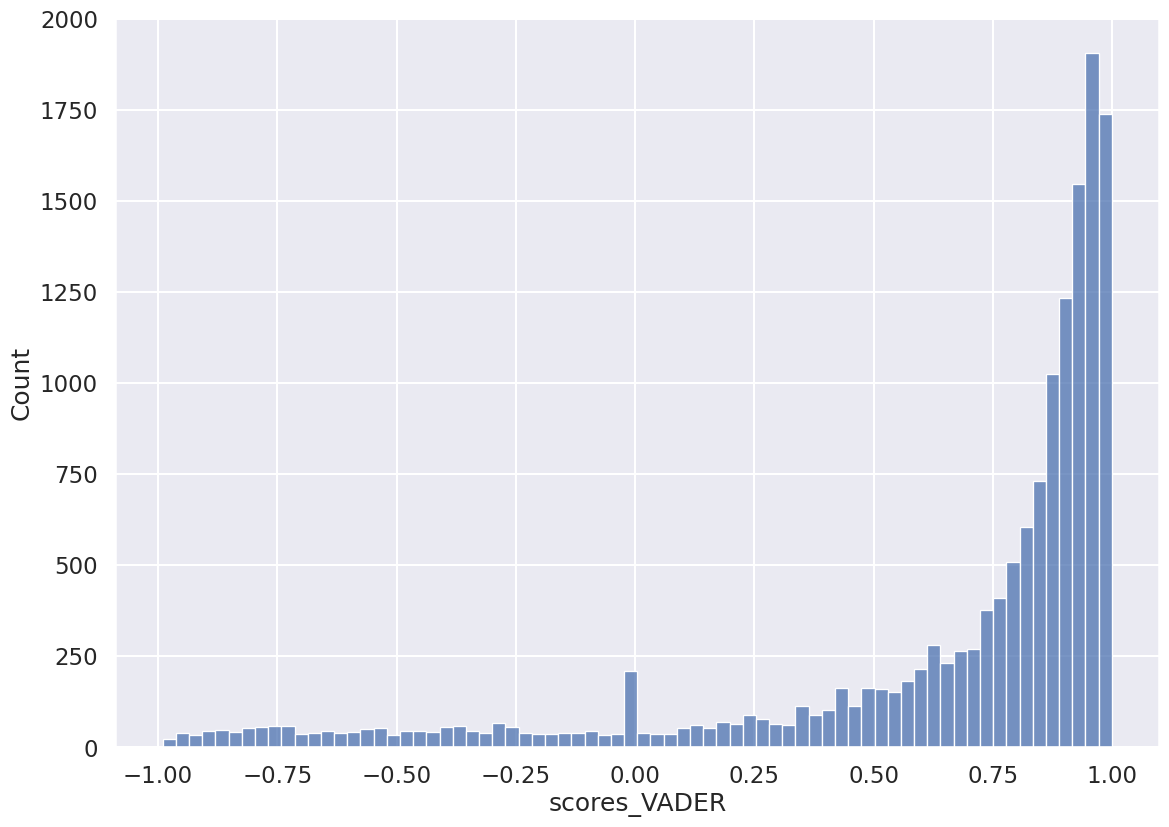

In [7]:
sns.histplot(review_data['scores_VADER'],  label='Score')

<Axes: xlabel='scores_VADER', ylabel='Count'>

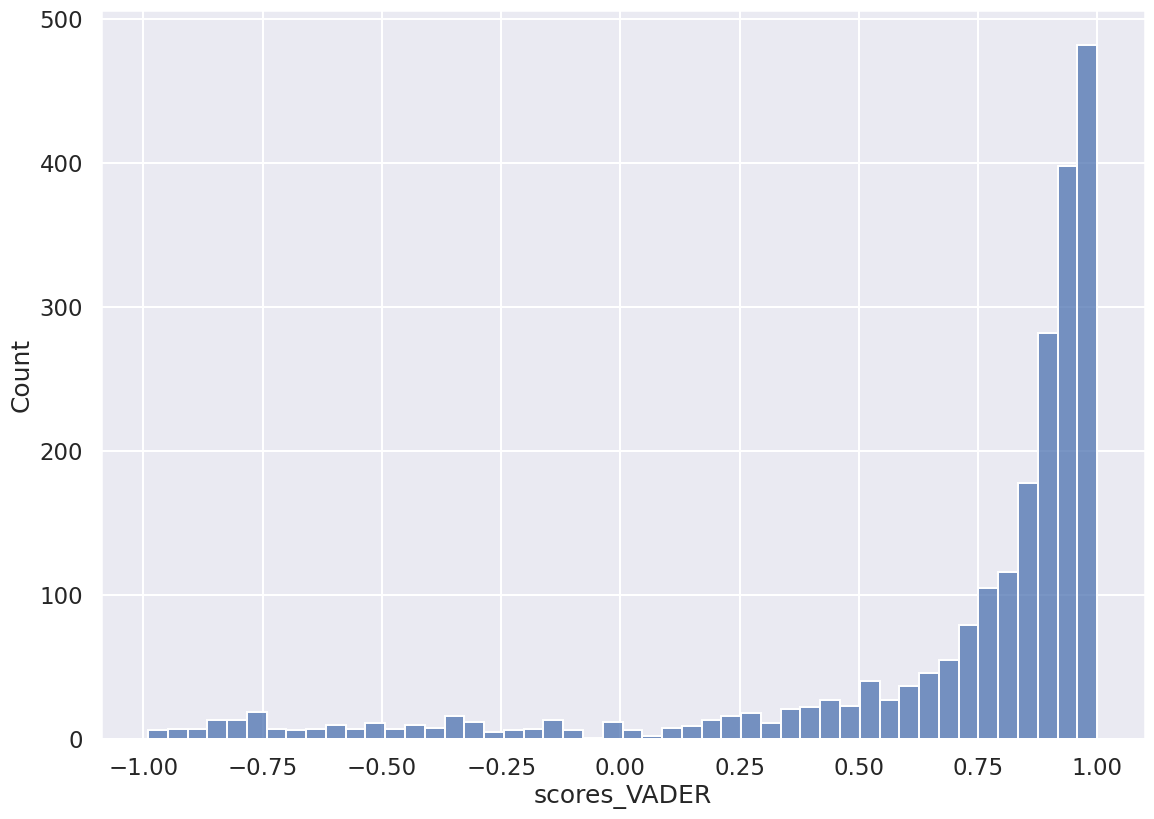

In [8]:

coffee = review_data[review_data['Text'].str.contains('coffee')]

sns.histplot(coffee['scores_VADER'], label='coffee')

In [9]:
coffee.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,scores_VADER
30,31,B003F6UO7K,AFM0O9480F04W,Sherril,0,0,5,1297641600,Great machine!,"I have never been a huge coffee fan. However, my mother purchased this little machine and talked me into trying the Latte Macciato. No Coffee Shop has a better one and I like most of the other products, too (as a usually non-coffee drinker!).<br />The little Dolche Guesto Machine is super easy to use and prepares a really good Coffee/Latte/Cappuccino/etc in less than a minute (if water is heated up). I would recommend the Dolce Gusto to anyone. Too good for the price and I'am getting one myself! :)",0.9702
55,56,B002GWHC0G,A2EFAW1P3DRXWO,TJ Fairfax,0,0,5,1349395200,Our guests love it!,"We roast these in a large cast iron pan on the grill (about 1/3 of the bag at a time). The smell is wonderful and the roasted beans taste delicious too. More importantly, the coffee is smooth; no bitter aftertaste. On numerous occasions, we've had to send the roasted beans home with friends because they like it so much.",0.9511
82,83,B003ZFRKGO,A2VOZX7YBT0D6D,"Johnnycakes ""Johnnycakes""",15,15,5,1325635200,Forget Molecular Gastronomy - this stuff rockes a coffee creamer!,"I know the product title says Molecular Gastronomy, but don't let that scare you off. I have been looking for this for a while now, not for food science, but for something more down to earth. I use it to make my own coffee creamer.<br /><br />I have to have my coffee blonde and sweet - but the flavored creamers are full of the bad kinds of fat, and honestly, I hate to use manufactured ""food"" items. I really don't think they are good for the body. On the other hand, I hate using cold milk or cream, because I like HOT coffee.<br /><br />I stumbled across this on Amazon one day and got the idea of making my own creamer. I also bought low-fat (non-instant) milk powder and regular milk powder. The non-instant lowfat milk is a little sweeter and tastes fresher than regular instant low-fat milk, but does not dissolve good in cold water - which is not a problem for hot coffee. You will have to play with the ratios - I would not do just the heavy cream, it made the coffee too rich. Al...",0.9945
111,112,B0037LW78C,A3VEYLW2KPZNGK,G. Simmons,3,3,5,1297814400,Delicious tea,I have been drinking this tea for a long time now. I used to have to purchase it at a doctor's office because it wasn't available elsewhere. I'm so glad that I can buy it now from Amazon.com. I drink this tea throughout the day like other folks drink coffee. Wonderful taste.,0.8769
112,113,B0037LW78C,A2F65U0UDY7TAW,Aldo,2,2,5,1337990400,My every day green tea,"I have been drinking Royal King 100% Natural Organic Green Tea (100 tea bags x 2g each) as my every day tea for several years now. I buy 12 boxes at a time to save on shipping. For many years I used to drink coffee from morning till night. But finally I realized that drinking so much coffee was not healthy for me. I finally resolved to improve my health and stopped drinking coffee all together. I tried many alternative drinks to replace my coffee habit. I found that green tea was not only good tasting it also has health benefits. Green tea is one of the few drinks that actually makes you healthier (coffe and other drinks do not) - the only healthier drink is quality cold water. In my opinion, for the price, Royal King 100% Natural Organic Green Tea is one of the best tasting teas. This green tea has a beautiful golden color, the taste is bright and fresh. I recommend adding a tiny amount of Y.S. Organic Bee Farms RAW HONEY to the tea to add sweetness and health benefits t...",0.9958
153,154,B002HQAXUW,A17ESTP5T7T1PH,Bumbeda1,1,1,1,1324944000,Rip off Price,"These singles sell for $2.50 - $3.36 at the store for 1 box of 24 singles. I'm not sure why Amazon is selling it for $9.99 for a box of 24 singles. Hazelnut coffee creamer is my favorite, but truly this is not a good buy.",0.25

<Axes: xlabel='scores_VADER', ylabel='Count'>

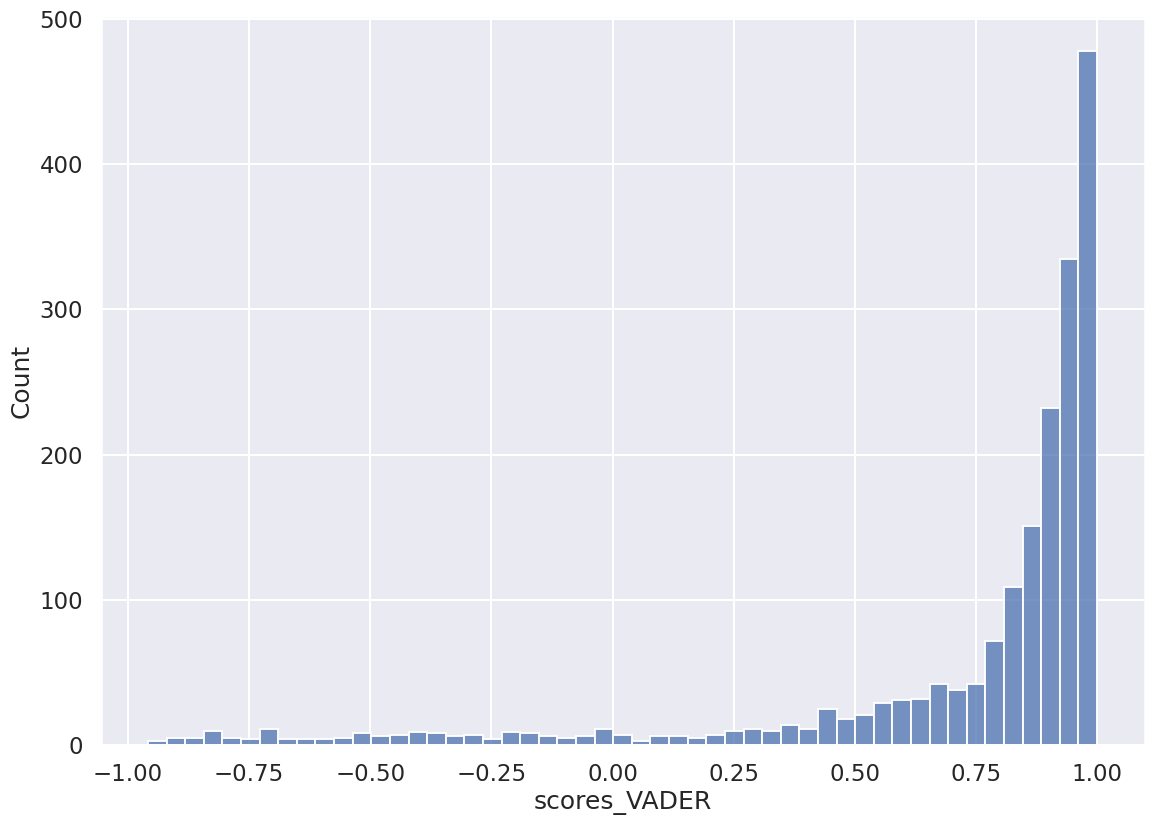

In [10]:
price = review_data[review_data['Text'].str.contains('price')]

sns.histplot(price['scores_VADER'],  label='price')

In [11]:
price.head(20)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,scores_VADER
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",0.9468
19,20,B001GVISJM,A3IV7CL2C13K2U,Greg,0,0,5,1318032000,Home delivered twizlers,Candy was delivered very fast and was purchased at a reasonable price. I was home bound and unable to get to a store so this was perfect for me.,0.6077
21,22,B001GVISJM,AZOF9E17RGZH8,Tammy Anderson,0,0,5,1308960000,TWIZZLERS,"I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.<br />There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. <a href=""http://www.amazon.com/gp/product/B001GVISJM"">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>",0.9153
27,28,B001GVISJM,AAAS38B98HMIK,Heather Dube,0,1,4,1331856000,Great Bargain for the Price,I was so glad Amazon carried these batteries. I have a hard time finding them elsewhere because they are such a unique size. I need them for my garage door opener.<br />Great deal for the price.,0.8606
30,31,B003F6UO7K,AFM0O9480F04W,Sherril,0,0,5,1297641600,Great machine!,"I have never been a huge coffee fan. However, my mother purchased this little machine and talked me into trying the Latte Macciato. No Coffee Shop has a better one and I like most of the other products, too (as a usually non-coffee drinker!).<br />The little Dolche Guesto Machine is super easy to use and prepares a really good Coffee/Latte/Cappuccino/etc in less than a minute (if water is heated up). I would recommend the Dolce Gusto to anyone. Too good for the price and I'am getting one myself! :)",0.9702
31,32,B003F6UO7K,A31OQO709M20Y7,"Molly V. Smith ""staral""",0,1,5,1288310400,THIS IS MY TASTE...,"This offer is a great price and a great taste, thanks Amazon for selling this product.<br /><br />Staral",0.9153
36,37,B001EO5QW8,A1MYS9LFFBIYKM,"Abby Chase ""gluten free""",2,2,5,1190851200,Love Gluten Free Oatmeal!!!,"For those of us with celiac disease this product is a lifesaver and what could be better than getting it at almost half the price of the grocery or health food store! I love McCann's instant oatmeal - all flavors!!!<br /><br />Thanks,<br />Abby",0.9196
60,61,B004N5KULM,A1ZR8O62VSU4OK,"Lisa J. Szlosek ""lisa""",2,4,3,1318723200,Better price for this at Target,"Watch your prices with this. While the assortment was good, and I did get this on a gold box purchase, the price for this was<br />$3-4 less at Target.",0.4404
68,69,B000E7VI7S,A1KL2LAW08X6UQ,calmnsense,0,0,3,1169251200,How much would you pay for a bag of chocolate pretzels?,"If you're impulsive like me, then $6 is ok. Don't get me wrong, the quality of these babies is very good and I have no complaints. But in retrospect, the price is a little ridiculous (esp. when you add on the shipping).",0.3489
71,72,B001GVISJC,A3BDOAPSF96WGQ,2tall,1,1,5,1289260800,Bigger then other brands,"Grape gummy bears are hard to find in my area. In fact pretty much anyone I talk to about grape gummy bears they think I'm lying. So I bought 10lbs... : ) These bears are a little bit bigger then the other brands and have kind of sour kick, but nothing to strong. I love grape flavored candy/soda and these are pretty good. There is another company that makes grape gummy bears that are a little bit better in my opinion, but these are well worth it for the price. I like to use the gummy bears in home made Popsicles with flavored sports drink. The salt in the sports drink makes for softer popsicles, and the gummy bears are awesome frozen. They are delicious!",0.9869
